El bordado a punto cruz es una técnica de artesanía. Puede leer más al respecto en https://es.wikipedia.org/wiki/Punto_de_cruz

Usualmente con un número limitado de colores, se pueden crear imágenes

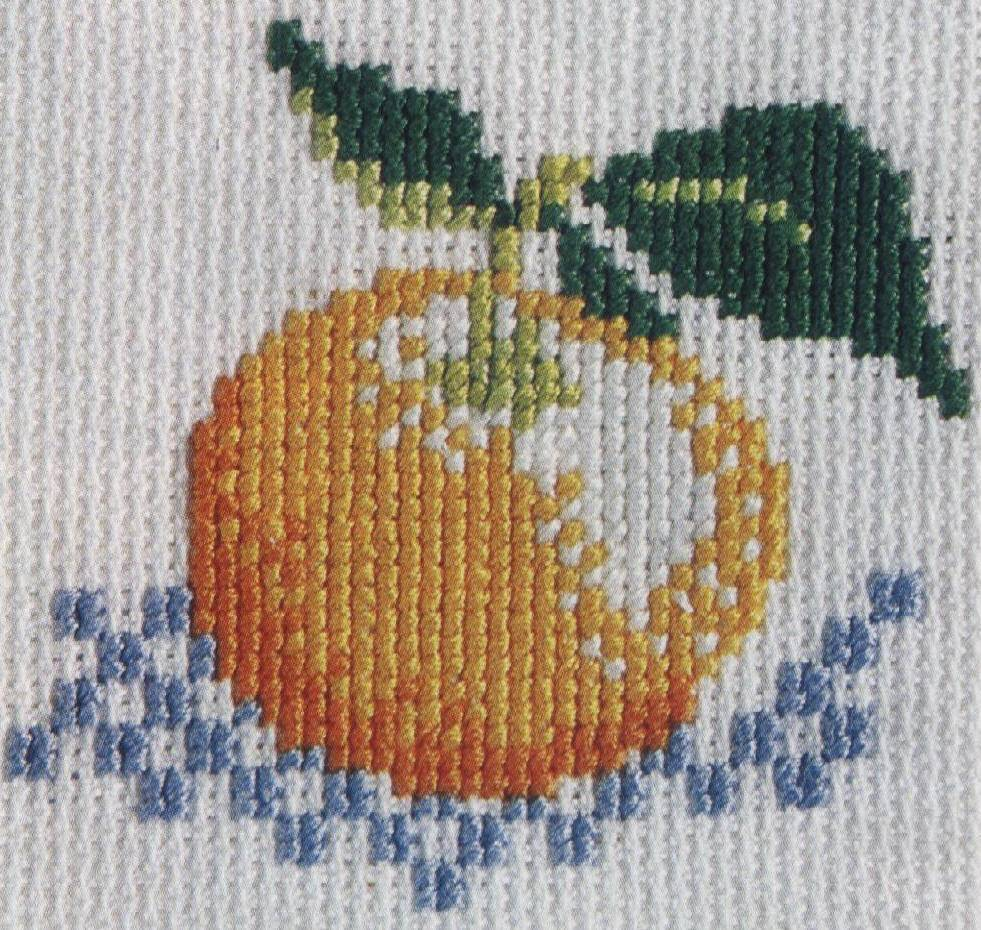

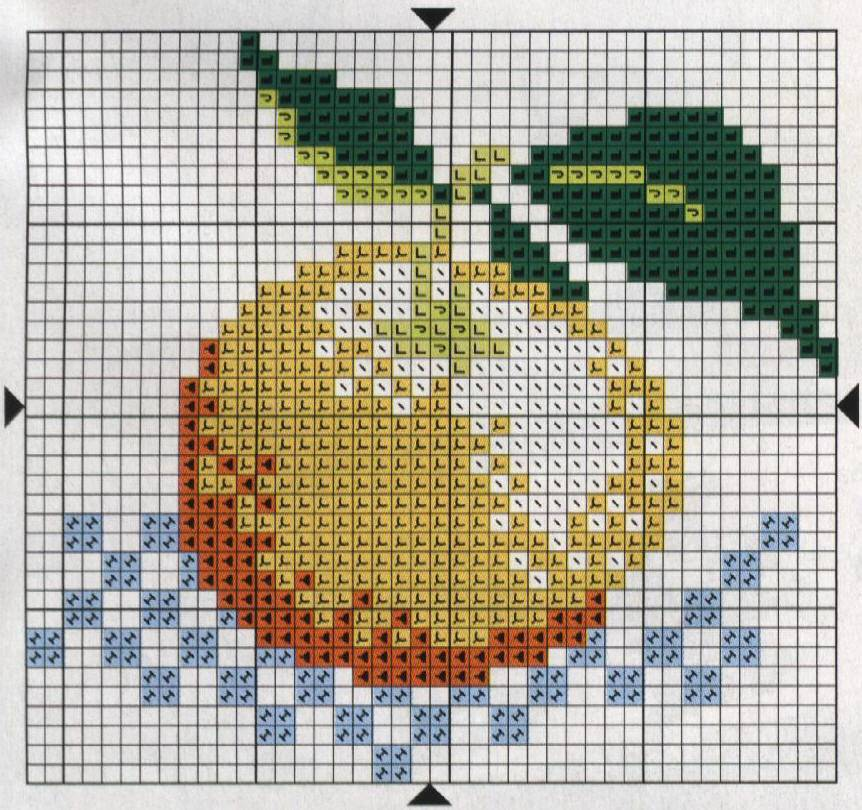

Use el método de clustering k-means de scikit-learn [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para crear una instrucción para el bordado de punto cruz, usando una cantidad limitada de colores, en base a una foto a colores (no usar la imágenes previas).

# Ejercicios

### Paso 1 - Lectura de una imagen a colores con un link (2 punto)

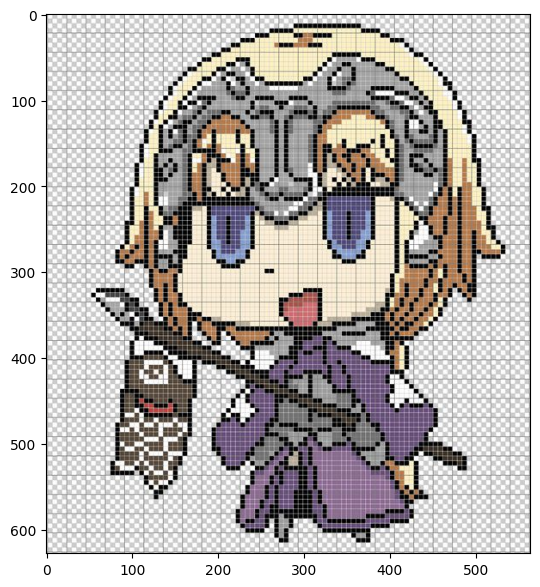

In [7]:
###### Complete su código a continuación (escoja una imagen apropiada)
from skimage import io
import matplotlib.pyplot as plt
totoro = "https://i.pinimg.com/564x/66/b4/59/66b459f283d8b88e938516cb62bdb680.jpg"
GatoCornio = "https://farm5.staticflickr.com/4637/39184279232_1be2c5c967.jpg"
gato_cohete = "https://static.wikia.nocookie.net/meltyblood/images/2/26/Neco_Arc.png/revision/latest/scale-to-width-down/512?cb=20181003123026"
juana_de_arco = "https://i.pinimg.com/564x/d3/c8/b6/d3c8b6b3a25e66fd5fc6f5429f14647c.jpg"
img = io.imread(juana_de_arco)
plt.figure(figsize=(7,7))
plt.imshow(img)

### Paso 2 - realice el `resize` apropiado de una imagen (2 puntos)




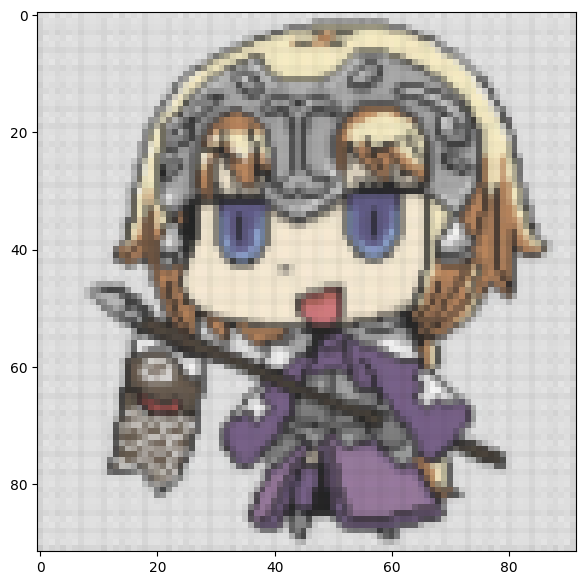

In [8]:
#@title **Tamaño de la imagen destino**
ancho = 92 #@param {type:"slider", min:0, max:100, step:1}
alto = 92 #@param {type:"slider", min:0, max:100, step:1}
###### Complete su código a continuación
from skimage.transform import resize
img_resized = resize(img, (alto, ancho), anti_aliasing = True)
plt.figure(figsize=(7,7))
plt.imshow(img_resized)

### Paso 3 - realize la cuantización usando `sklearn.cluster.KMeans` (6 puntos)

**Hint:** Probablemente necesitará hacer un `reshape` a la imagen

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


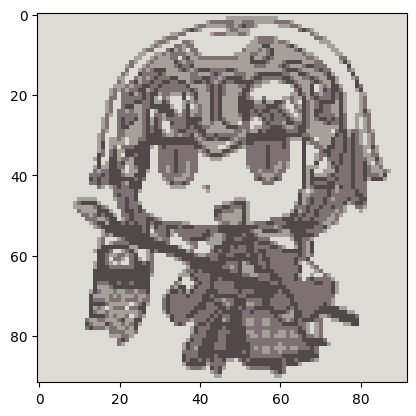

In [9]:
#@title **Cantidad de colores**
k = 4 #@param {type:"slider", min:2, max:10, step:1}
###### Complete su código a continuación
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
img = img_resized
#img = np.array(img, dtype=np.float64) / 255
# reshape
img_reshape = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
# kmeans
#kmeans = KMeans(n_clusters=k, random_state = 0)
#img_sample = shuffle(img_reshape, random_state = 0)[:1000]
#clusters = kmeans.fit_predict(img_sample)
#labels = kmeans.predict(img_reshape)
kmeans = KMeans(n_clusters = k)
kmeans.fit(img_reshape)
centers = kmeans.cluster_centers_
centers = centers[kmeans.labels_]
centers = centers.reshape(img_resized.shape)
plt.imshow(centers)

### Paso 4 - Imprima la imagen cuantizada usando símbolos, como en el ejemplo abajo (6 puntos)

In [10]:
###### Complete su código a continuación
# recreate img
recreate = np.empty((len(centers[0]),len(centers[1])) , dtype=object)
recreate.fill([])
recreate.tolist()
simbolos = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
for i in range(len(centers[0])):
  for j in range(len(centers[1])):
    for k in range(len(kmeans.cluster_centers_)):
      if (centers[i][j] == kmeans.cluster_centers_[k]).any():
        recreate[i][j] = simbolos[k]
for i in range(len(recreate[0])):
  print("".join(recreate[i][j] for j in range(len(centers[1]))))


00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000222222222222200000000000000000000000000000000
00000000000000000000000000000000000000000023333332233322222333320000000000000000000000000000
00000000000000000000000000000000000000023322222332313320000022233200000000000000000000000000
00000000000000000000000000000000000023132000000233222000000000000313200000000000000000000000
00000000000000000000000000000000022330000002333222332000000000000000320000000000000000000000
00000000000000000000000000000002333000000000000000000023333200000000033200000000000000000000
00000000000000000000000000000233200033200000000000000223333233200000002220000000000000000000
00000000000000000000000000002320003323300000000000002222112222312000000022000000000000000000
00000000000000000000000000233000312320330000000000032223231222223120000002200000000000000000
0000000000000000000000000220022323333223200000000222233223122222223220

### Paso 5 - Imprima la tabla de colores: número y color RGB  (4 puntos)

Tienes que usar estos 4 colores:


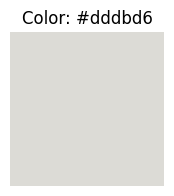

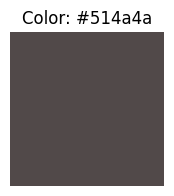

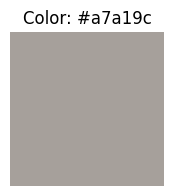

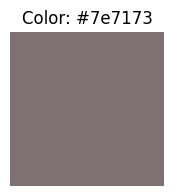

In [11]:
###### Complete su código a continuación
from matplotlib.colors import to_hex
palette = kmeans.cluster_centers_
# Convert data to format accepted by imshow
palette_list = list()
for color in palette:
    palette_list.append([[tuple(color)]])
# Show color palette
print("Tienes que usar estos {} colores:".format(len(palette_list)))
for i in range(len(palette_list)):
    plt.figure(figsize=(2,2))
    plt.subplot()
    plt.title("Color: {}".format(to_hex(palette_list[i][0][0])))
    plt.imshow(palette_list[i]);
    plt.axis('off')
    plt.show();